In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [2]:
print(wine_df.isnull().sum())
wine_df.fillna(wine_df.mean(), inplace=True)


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [ ]:
Q1 = wine_df.quantile(0.25)
Q3 = wine_df.quantile(0.75)
IQR = Q3 - Q1
outliers = np.where((wine_df < (Q1 - 1.5 * IQR)) | (wine_df > (Q3 + 1.5 * IQR)))
wine_df['outliers'] = wine_df.median()

In [3]:
inconsistent_values = wine_df[wine_df['alcohol'] < 0]
wine_df.loc[inconsistent_values.index, 'alcohol'] = wine_df['alcohol'].median()
wine_df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
validation_rules = {
'alcohol': {'min': 0, 'max': 20},
'malic_acid': {'min': 0, 'max': 5},
'magnesium': {'min': 0, 'max': 150},
'alcalinity_of_ash': {'min': 0, 'max': 50},
}

In [8]:
for column, rules in validation_rules.items():
    if wine_df[column].min() < rules['min'] or wine_df[column].max() >rules['max']:
        print(f"Validation failed for column {column}")
    else:
        print(f"Validation passed for column {column}")

Validation passed for column alcohol
Validation failed for column malic_acid
Validation failed for column magnesium
Validation passed for column alcalinity_of_ash


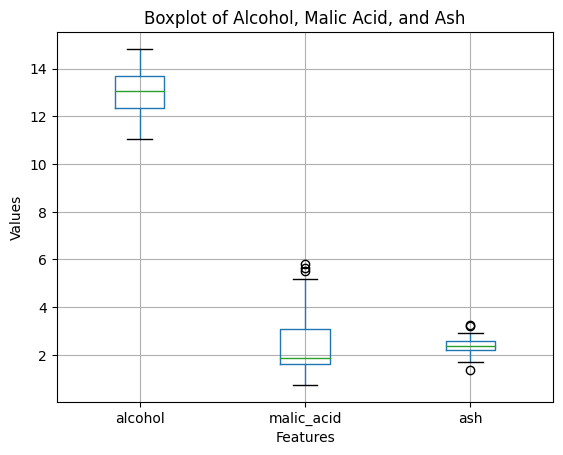

In [12]:
import matplotlib.pyplot as plt

# Create a boxplot for the selected columns
wine_df[['alcohol', 'malic_acid', 'ash']].boxplot()

# Set the title and labels for the plot
plt.title('Boxplot of Alcohol, Malic Acid, and Ash')
plt.xlabel('Features')
plt.ylabel('Values')

# Display the plot
plt.show()